<a href="https://colab.research.google.com/github/Vsevolod245/CV_MAI_2023/blob/main/HW5_1_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Исправьте код применения оператора Собеля, который мы писали на занятии, таким образом, чтобы оператор применялся по обоим направлениям (x и y).

2. На занятии мы попробовали несколько фильтров различного назначения (это размытие, устранение шумов, выделение границ и тд). Каждый алгоритм, осуществляющий фильтрацию изображения, обычно имеет несколько параметров, влияющих на результат (размер ядра и тд). И для того, чтобы понять, какое именно влияние оказывают каждый из параметров или их комбинация, может потребоваться перезапустить код много раз с разными значениями параметров, что не удобно. Поэтому в этом задании вам предлагается создать оконное приложение, отображающее результат применения того или иного фильтра (можете выбрать любой, например, Canny), интерфейс (кнопки, чек-боксы, ползунки и тд), позволяющий варьировать значения параметров фильтра и смотреть, как это влияет на результат в реальном времени (обновляя выводимое изображение). Пример реализации такого интерфейса на OpenCV можно найти здесь: https://docs.opencv.org/4.x/d9/dc8/tutorial_py_trackbar.html

3. К изображению hong.png из папки необходимо подобрать такую морфологическую операцию, чтобы устранить с таблички слова, написанные черным цветом


---




In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen
import numpy as np



---


Задание 1

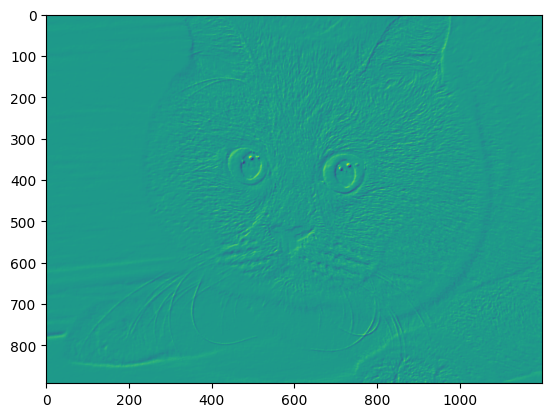

In [2]:
req = urlopen('https://dobrovserdce.ru/images/2022/11/02/kot%20Fedya_large.jpeg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.cvtColor(cv2.imdecode(arr, -1), cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
res = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
plt.imshow(res)



---

Задание 2



In [ ]:
import numpy as np
import cv2
from urllib.request import urlopen

def nothing(x):
    pass

req = urlopen('https://dobrovserdce.ru/images/2022/11/02/kot%20Fedya_large.jpeg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_hong = cv2.imdecode(arr, -1)
img = np.asarray(cv2.resize(cv2.cvtColor(img_hong, cv2.COLOR_BGR2GRAY),(int(img_hong.shape[1] * 0.5), int(img_hong.shape[0] * 0.5))))
cv2.namedWindow('Laplacian')
cv2.createTrackbar('ksize','Laplacian',0,30,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    ks = cv2.getTrackbarPos('ksize','Laplacian')
    if ks%2 ==0:
        ks = ks+1
    laplacian = cv2.Laplacian(img, cv2.CV_64F, ksize = ks)
    cv2.imshow('Laplacian', laplacian)
cv2.destroyAllWindows()



---


Задание 3

In [ ]:
# загружаем картинки
req = urlopen('https://i.imgur.com/UoCLMrH.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_hong = cv2.imdecode(arr, -1)
plt.imshow(img_hong)
res = cv2.dilate(np.asarray(img_hong),np.ones((5,5),np.uint8), 2)
plt.imshow(res)